# Homework 4

# Due Date: 2024-11-13 at 8:30 AM PT

# Name: Alejandro Roa

# Homework - Regression Trees

#### The goal of this analysis is to use a regression tree to predict the number of per-capita COVID-19 deaths in each county in the US using the SVI variables.


#### 1. Load the data file.

In [2]:
import pandas as pd

In [6]:
covid_data = pd.read_csv('../data/processed/svi_covid.csv')

In [4]:
covid_data.head(1000)

,Unnamed: 0,fips_code,total_cases_per_100k,total_deaths_per_100k,E_TOTPOP,EP_POV150,EP_UNEMP,EP_HBURD,EP_NOHSDP,EP_UNINSUR,...,EP_DISABL,EP_SNGPNT,EP_LIMENG,EP_MINRTY,EP_MUNIT,EP_MOBILE,EP_CROWD,EP_NOVEH,EP_GROUPQ,EP_NOINT
0,1,1001,33888.123075,399.925120,58761,20.2,2.8,19.7,9.6,7.4,...,16.4,5.6,0.4,27.4,3.9,15.6,1.4,4.0,0.9,10.9
1,2,1003,30212.064090,313.169394,233420,18.3,3.4,23.2,8.4,9.3,...,13.9,4.2,0.8,17.7,16.6,10.2,1.9,2.3,1.5,10.9
2,3,1005,30477.951521,418.056840,24877,37.7,5.8,25.1,23.5,10.7,...,18.1,11.3,2.0,55.4,1.4,29.2,3.8,11.7,12.0,31.8
3,4,1007,36623.073120,498.853984,22251,29.0,8.7,23.2,21.1,8.4,...,19.6,7.2,0.3,25.8,2.7,30.6,1.3,7.5,6.4,20.2
4,5,1009,31944.750072,441.796300,59077,22.9,6.0,19.4,18.2,10.2,...,17.0,5.3,2.2,14.3,0.9,23.9,2.3,4.8,1.0,16.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,21019,48575.929688,451.888396,48242,26.8,6.9,23.3,11.3,5.4,...,21.9,7.6,0.2,7.8,4.9,10.1,1.0,8.7,3.6,13.9
996,997,21021,37800.934244,565.119394,30613,25.3,6.2,27.5,9.6,5.9,...,17.3,7.2,0.5,15.5,2.3,5.3,0.4,5.8,9.4,15.5
997,998,21023,33230.403800,344.418052,8420,27.8,6.2,17.5,12.0,4.1,...,17.0,5.7,0.0,4.5,2.6,25.9,1.9,2.6,0.3,16.6
998,999,21025,40640.648012,567.010309,13580,38.3,8.9,18.6,20.5,3.7,...,30.6,6.3,0.1,3.9,1.1,38.4,3.6,13.3,2.2,25.1


#### 2. Write the following functions:

#### - A function that fits a regression tree to data. The function should take as input the data, the outcome variable, the predictor variables, and the maximum depth of the tree. The function should return the fitted tree.
#### Note: Many packages have functions that penalize the complexity of the tree to avoide overfitting. You should make sure that the function you write does not use any penalization for the complexity of the tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor


In [ ]:
predictors = covid_data[predictors_var]
outcome = covid_data[outcome_var]

In [ ]:
reg_tree = DecisionTreeRegressor(max_depth=max_depth)
reg_tree.fit(predictors, outcome)

return reg_tree

#### - A function that predicts the outcome variable using a fitted tree. The function should take as input the fitted tree and the data for which to make predictions. The function should return the predicted values.


In [ ]:
prediction = predict_with_tree(reg_tree, predictors)

return prediction

#### - A function that calculates the mean squared error of the predictions. The function should take as input the predicted values and the true values. The function should return the mean squared error.

In [ ]:
mse = mean_squared_error(true, prediction)

### 3. Use 5-fold cross-validation to calculate the mean squared error of the regression tree for maximum tree depths 1, ..., 10.

#### Depth 1

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

In [10]:
predictors_var = [
    'EP_POV150', 'EP_UNEMP', 'EP_HBURD', 'EP_NOHSDP', 'EP_UNINSUR', 
    'EP_AGE65', 'EP_AGE17', 'EP_DISABL', 'EP_SNGPNT', 'EP_LIMENG', 
    'EP_MINRTY', 'EP_MUNIT', 'EP_MOBILE', 'EP_CROWD', 'EP_NOVEH', 
    'EP_GROUPQ', 'EP_NOINT'
]

In [11]:
outcome_var = 'total_deaths_per_100k'

In [12]:
predictors = covid_data[predictors_var]
outcome = covid_data[outcome_var]

In [43]:
mse_score = []

In [44]:
for max_depth in range(1,12):
    reg_tree = DecisionTreeRegressor(max_depth=max_depth)
    mse = -cross_val_score(reg_tree, predictors, outcome, cv=5, scoring='neg_mean_squared_error').mean()
    mse_score.append((max_depth, mse))

In [45]:
mse_score

[(1, np.float64(26949.98641058391)),
 (2, np.float64(24660.588461888496)),
 (3, np.float64(24149.00709657455)),
 (4, np.float64(24487.264777945544)),
 (5, np.float64(25692.74396521406)),
 (6, np.float64(27294.756197557745)),
 (7, np.float64(30051.264534417474)),
 (8, np.float64(30970.360226475266)),
 (9, np.float64(32254.475583302217)),
 (10, np.float64(33066.64117042977)),
 (11, np.float64(34071.80107848442))]

In [46]:
mse_results_df = pd.DataFrame(mse_score, columns=['max_depth', 'mean_squared_error'])

In [47]:
print(mse_results_df)

    max_depth  mean_squared_error
0           1        26949.986411
1           2        24660.588462
2           3        24149.007097
3           4        24487.264778
4           5        25692.743965
5           6        27294.756198
6           7        30051.264534
7           8        30970.360226
8           9        32254.475583
9          10        33066.641170
10         11        34071.801078


#### 4. Plot the mean squared error as a function of the maximum tree depth.


In [48]:
import matplotlib.pyplot as plt


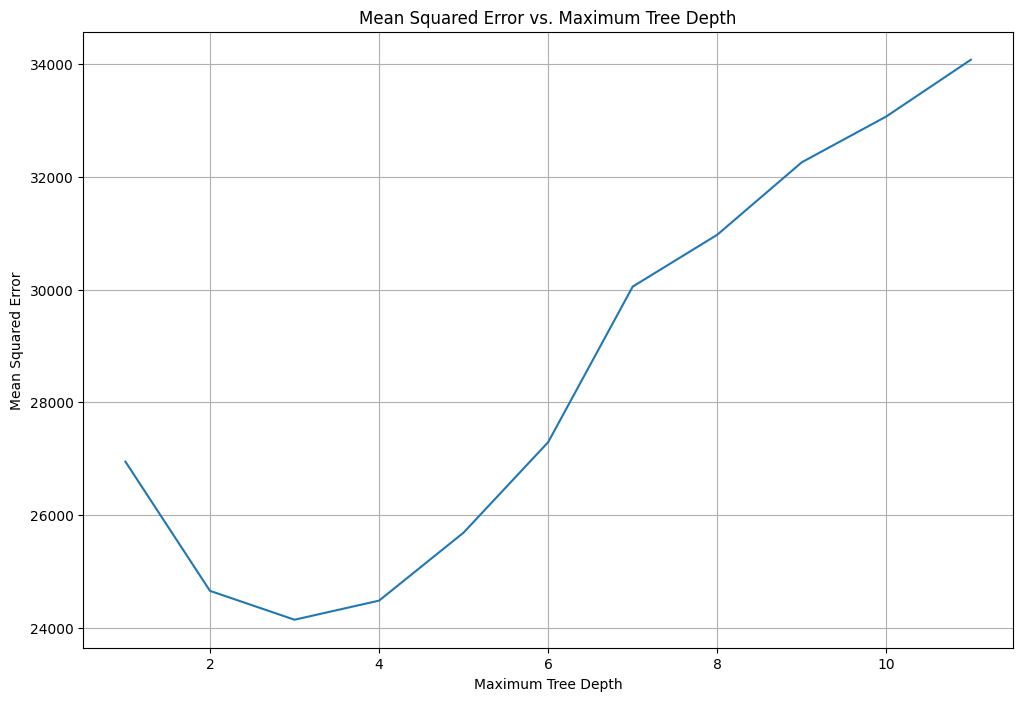

In [51]:
plt.figure(figsize=(12, 8))
plt.plot(mse_results_df['max_depth'], mse_results_df['mean_squared_error'])
plt.title("Mean Squared Error vs. Maximum Tree Depth")
plt.xlabel("Maximum Tree Depth")
plt.ylabel("Mean Squared Error")
plt.grid(True)
plt.show()

#### 5. Which maximum tree depth would you choose based on the cross-validation results? Why?


I would choose a maximum tree depth of 3, which in this case has the lowest MSE; thus, a depth of 3 performs better in minimizing the prediction error on cross-validation data. Choosing a depth above 3 might be indicative of an overfit.

#### 6. Fit a regression tree to the full data using the maximum tree depth you chose in the previous question.


In [52]:
reg_tree = DecisionTreeRegressor(max_depth=3)

In [53]:
reg_tree.fit(predictors,outcome)

DecisionTreeRegressor(max_depth=3)

In [54]:
print(reg_tree)

DecisionTreeRegressor(max_depth=3)


#### 7. Plot the fitted tree. Summarize the tree in words. What variables seem to be the most important predictors of the number of per-capita COVID-19 deaths?

In [56]:
from sklearn.tree import plot_tree


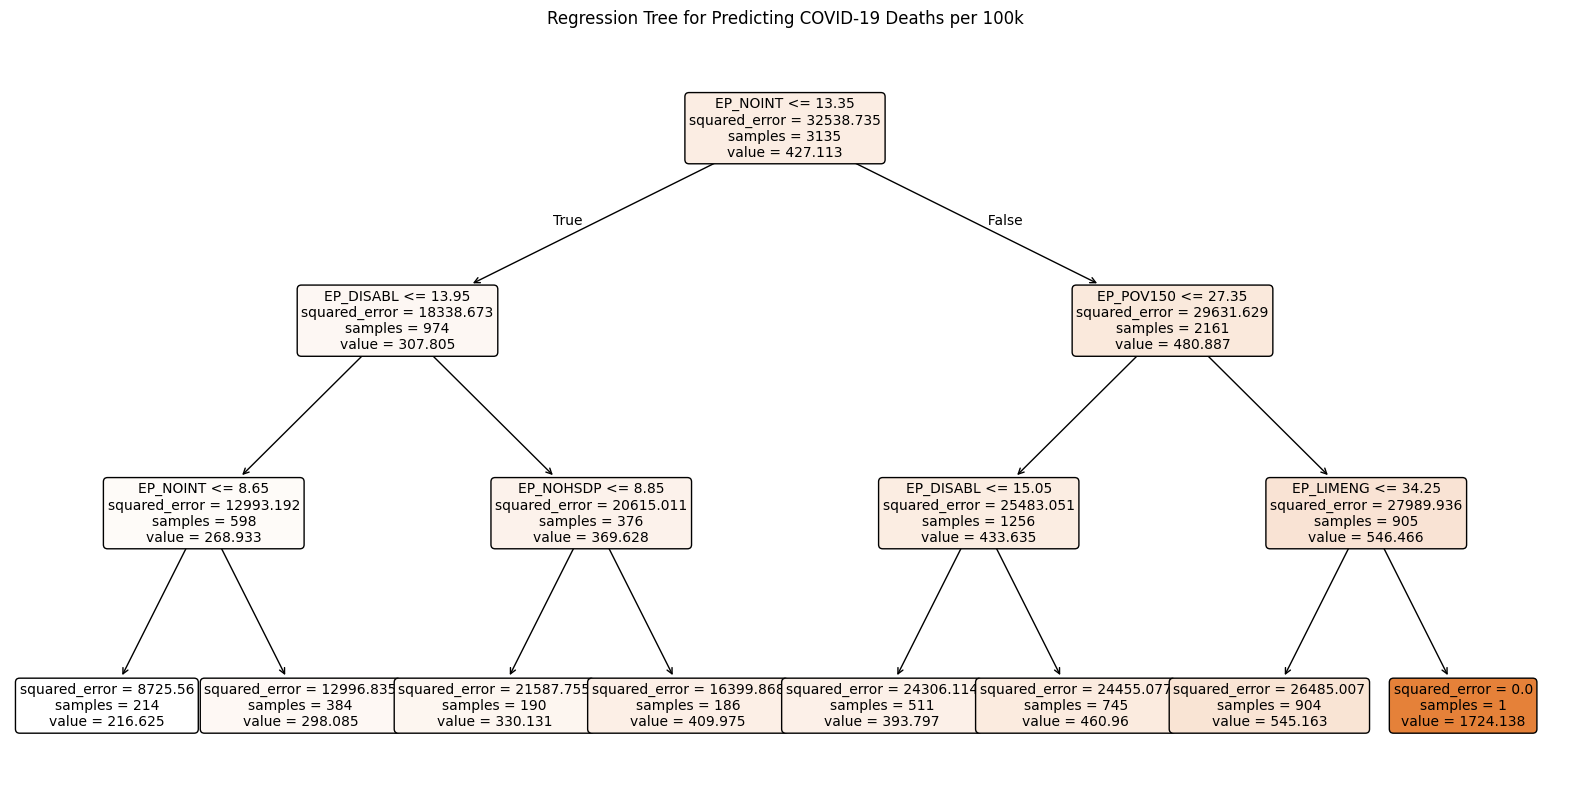

In [58]:
plt.figure(figsize=(20, 10))
plot_tree(reg_tree, feature_names=predictors_var, filled=True, rounded=True, fontsize=10)
plt.title("Regression Tree for Predicting COVID-19 Deaths per 100k")
plt.show()

EP_NOINT, EP_DISABL, EP_POV150, EP_NOHSDP, EP_LIMENG are the most important predictors of the number of per-capita COVID-19 deaths. EP_NOINT is displayed at the top of the tree, which could be reflecting a correlation between internet access and health information as a critical in COVID-19 cases management. EP_DISABL suggests that higher rates of disability may indicate populations more vulnerable to severe outcomes. EP_POV150 contains information on poverty levels and play an important role on explaining COVID-19 deaths. Poverty levels have been usually correlated with limited health care access, which is critical to prevent COVID-19 deaths. Finally. EP_NOHSDP and EP_LIMENG contain information on education levels and english proficiency respectively, which are also representative of socioeconomic status. 

#### 8. Plot the predicted values against the true values. How much would you trust the predictions of the regression tree? Why?

In [59]:
deaths_prediction =reg_tree.predict(predictors)

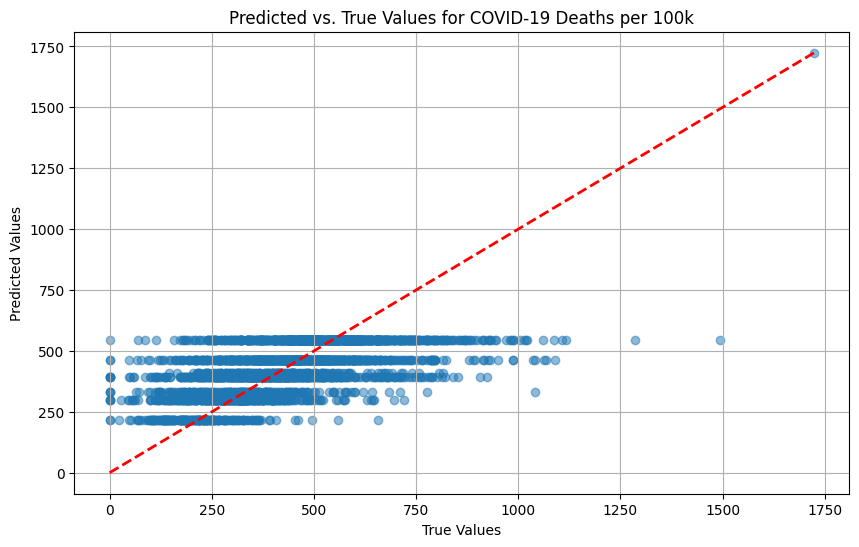

In [61]:
plt.figure(figsize=(10, 6))
plt.scatter(outcome, deaths_prediction, alpha=0.5)
plt.plot([outcome.min(), outcome.max()], [outcome.min(), outcome.max()], 'r--', lw=2) 
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs. True Values for COVID-19 Deaths per 100k")
plt.grid(True)
plt.show()

I don't trust in the predictions of the regression tree. The predicted values are clustered and don't cover the full range of true values.